In [1]:
!conda install seaborn==0.9.0 --yes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
sns.__version__

'0.9.0'

# Read Csv

In [77]:
datetime_cols = ['status_published']

raw_df = pd.read_csv('Live.csv', parse_dates=datetime_cols)
raw_df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [78]:
raw_df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [79]:
cat_cols = ['status_type']
numerical_cols = ['num_reactions', 'num_comments',
                  'num_shares', 'num_likes',
                  'num_loves', 'num_wows',
                  'num_hahas', 'num_sads',
                  'num_angrys']
other_cols = ['status_id']

# Cloning For Data Transformation

In [80]:
df = pd.DataFrame(data=raw_df, columns=raw_df.columns)

# General Outlook

In [81]:
df.shape

(7050, 16)

In [82]:
import math

def feature_distribution_plots(cols, df, categorical=False):
#     if len(cols) == 1:
#         if categorical:
#             sns.countplot(df[cols[0]]);
#         else:
#             sns.distplot(df[cols[0]].dropna())
#         return
    
    ncols = min(len(cols), 3)
    nrows = math.ceil(len(cols) / ncols)

    f, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 4.5))
            
    for i, col in enumerate(df[cols].columns):
        if ncols == 1 and nrows == 1:
            ax = axes
        elif ncols == 1 or nrows == 1:
            ax = axes[i]
        else:
            ax = axes[int(i / ncols), i % ncols]
        
        if categorical:
            sns.countplot(df[col], ax=ax);
        else:
            sns.distplot(df[col].dropna(), ax=ax)

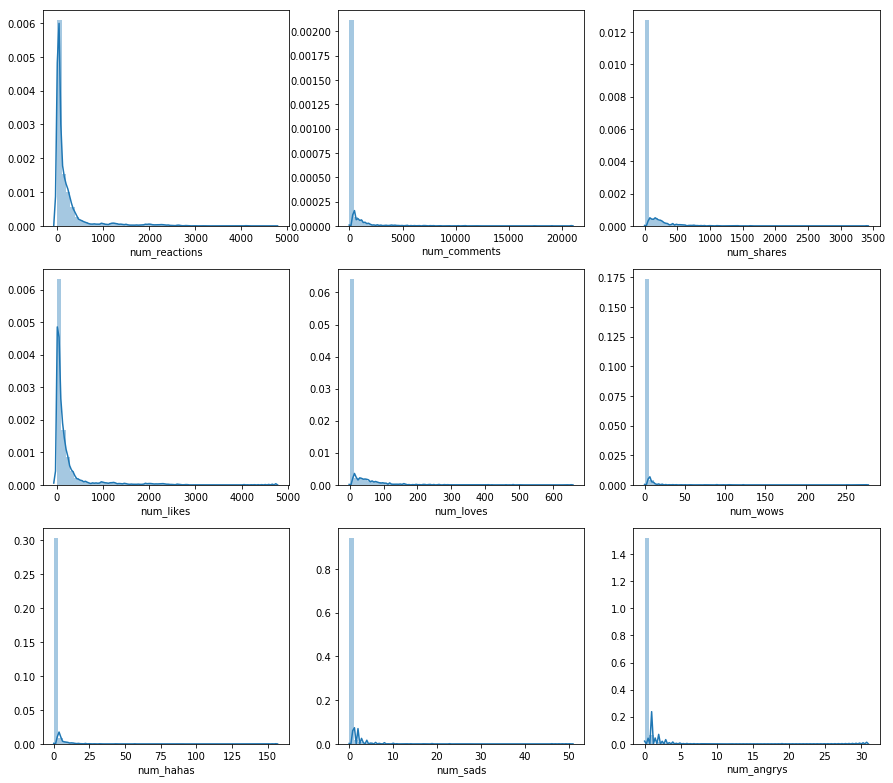

In [83]:
# Numerical kdeplots
feature_distribution_plots(numerical_cols, df)

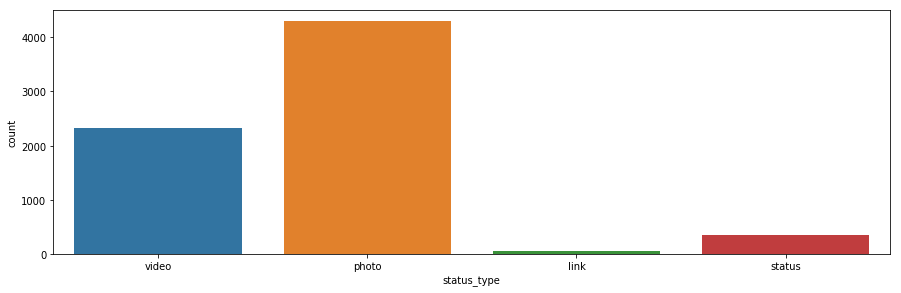

In [84]:
feature_distribution_plots(cat_cols, df, categorical=True)

# Picking (And Remove) Outliers (Possible Clusters)

Using Z score = ( Observation — Mean ) / Standard Deviation

In [85]:
from scipy import stats

def pick_outliers(remove_inplace=False):
    threshold = 3
    outliers = {}

    # Remove outliers (inplace)
    for col in numerical_cols:
        zscores = np.abs(stats.zscore(df[col]))
        outlier_indices = df[col][zscores >= threshold].index
        outliers[col] = outlier_indices

        if remove_inplace:
            df.drop(outlier_indices, inplace=True)

    # Print outliers count
    for key in outliers.keys():
        print(key + ' ' + str(len(outliers[key])))
        
    return outliers
        
pick_outliers(remove_inplace=True)

num_reactions 235
num_comments 126
num_shares 161
num_likes 210
num_loves 195
num_wows 141
num_hahas 64
num_sads 42
num_angrys 33


{'num_reactions': Int64Index([ 166, 1018, 1022, 1032, 1041, 1047, 1062, 1065, 1066, 1067,
             ...
             6239, 6240, 6243, 6247, 6248, 6249, 6254, 6261, 6270, 6272],
            dtype='int64', length=235),
 'num_comments': Int64Index([ 413,  475,  480,  482,  498, 2717, 2919, 2975, 3154, 3246,
             ...
             6932, 6935, 6939, 6944, 6949, 6955, 6964, 6974, 6977, 6978],
            dtype='int64', length=126),
 'num_shares': Int64Index([  99,  726, 3118, 3228, 3895, 4152, 4315, 4326, 4328, 4459,
             ...
             6398, 6404, 6411, 6414, 6429, 6615, 6616, 6625, 6638, 6705],
            dtype='int64', length=161),
 'num_likes': Int64Index([ 112,  343,  355,  361,  441,  694,  714, 1010, 1011, 1012,
             ...
             6245, 6246, 6256, 6258, 6266, 6267, 6271, 6297, 6523, 7001],
            dtype='int64', length=210),
 'num_loves': Int64Index([   0,    6,  198,  208,  238,  281,  293,  295,  356,  397,
             ...
             6122, 61

In [86]:
df.skew()

status_id        2.436327
num_reactions    2.333364
num_comments     5.888868
num_shares       4.363341
num_likes        2.493010
num_loves        3.635029
num_wows         2.856915
num_hahas        4.464623
num_sads         7.444946
num_angrys       7.082593
Column1               NaN
Column2               NaN
Column3               NaN
Column4               NaN
dtype: float64

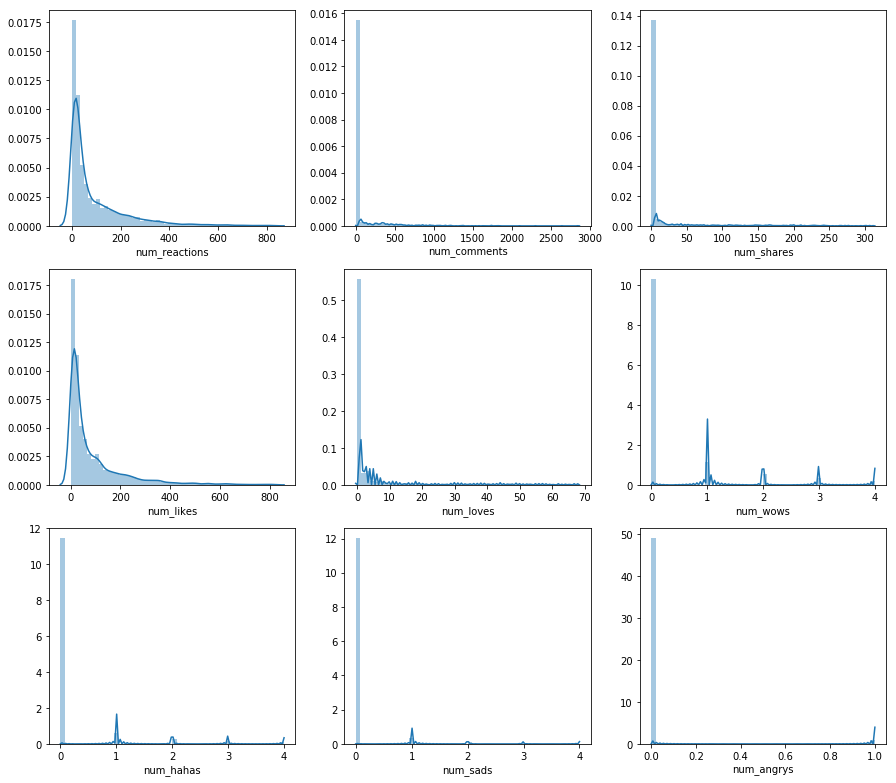

In [87]:
feature_distribution_plots(cols=numerical_cols, df=df)

# Log-Transform if skewness > 1

<img 
style="margin-left: 0"
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/446px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" />

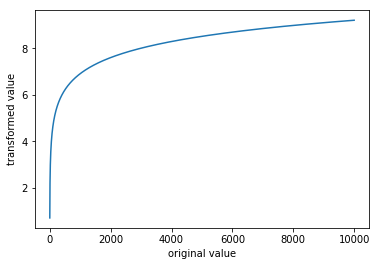

In [88]:
plt.xlabel('original value')
plt.ylabel('transformed value')
sns.lineplot(x=range(1, 10000), y=np.log1p(range(1, 10000)))

In [89]:
skewness = df[[col for col in df.columns if col not in other_cols]].skew() 

In [90]:
skewness[skewness.abs() > 1].index # if [-1, 1] => normally distributed

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [91]:
for col in skewness[skewness.abs() > 1].index:
    df[col] = df[col].map(np.log1p)

In [92]:
df.skew()

status_id        2.436327
num_reactions   -0.267282
num_comments     1.257311
num_shares       2.046935
num_likes       -0.270338
num_loves        1.831486
num_wows         2.180165
num_hahas        3.569752
num_sads         5.759769
num_angrys       7.082593
Column1               NaN
Column2               NaN
Column3               NaN
Column4               NaN
dtype: float64

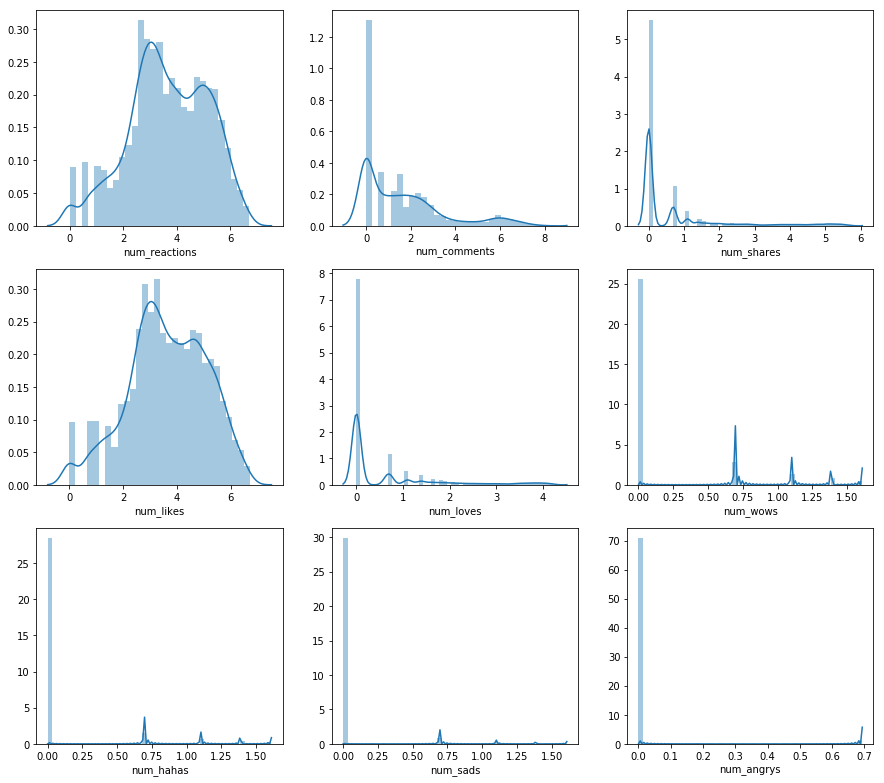

In [93]:
feature_distribution_plots(cols=numerical_cols, df=df)

# Missing Data Ratio Of Each Col

status_id           0.0
status_type         0.0
status_published    0.0
num_reactions       0.0
num_comments        0.0
num_shares          0.0
num_likes           0.0
num_loves           0.0
num_wows            0.0
num_hahas           0.0
num_sads            0.0
num_angrys          0.0
Column1             1.0
Column2             1.0
Column3             1.0
Column4             1.0
dtype: float64


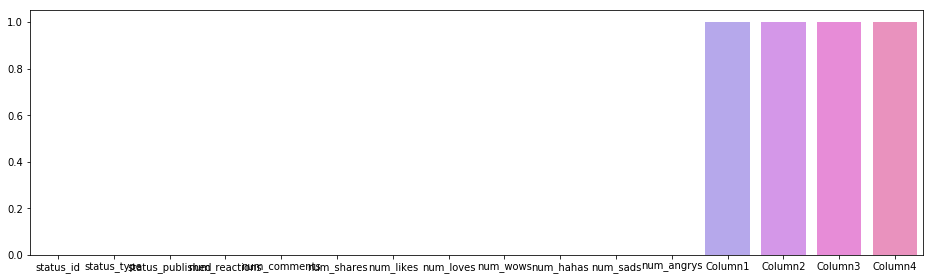

In [94]:
missing_ratios = df.isnull().sum() / len(df)
plt.figure(figsize=(16, 4.5))
sns.barplot(x=missing_ratios.index, y=missing_ratios.values)
print(missing_ratios)

In [95]:
# TODO: interpolate missing values

In [96]:
threshold = 0.5
df.drop(columns=missing_ratios[missing_ratios > threshold].index, inplace=True)

# Checking Data Type Of Each Col

In [97]:
df.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions              float64
num_comments               float64
num_shares                 float64
num_likes                  float64
num_loves                  float64
num_wows                   float64
num_hahas                  float64
num_sads                   float64
num_angrys                 float64
dtype: object

# Vectorize All Cols, Separate Id Cols

In [98]:
df = pd.get_dummies(columns=cat_cols, data=df)

In [99]:
for col in datetime_cols:
    df[col + '_year'] = df[col].map(lambda ts: ts.year)
    df[col + '_month'] = df[col].map(lambda ts: ts.month)
    df[col + '_day'] = df[col].map(lambda ts: ts.day)
    df[col + '_dayofweek'] = df[col].map(lambda ts: ts.dayofweek)
    df[col + '_hour'] = df[col].map(lambda ts: ts.hour)

In [100]:
dropped_columns = ['status_id']
status_ids = df[dropped_columns]

df.drop(columns=dropped_columns, inplace=True)

# Examine Correlations Between Cols

Correlations => Linear Relationships Between 2 Variables <br>

Strength of Relationship ( <a href="https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf"
target="_blank">source</a> )
<ul>
    <li>r &lt; 0.3 None or very weak</li>
    <li>0.3 &lt; r &lt; 0.5 Weak</li>
    <li>0.5 &lt; r &lt; 0.7 Moderate</li>
    <li>r &gt; 0.7 Strong</li>
</ul>

Note: Low Correlation does not mean "no relationship". They are possible curved / polynomially ... related

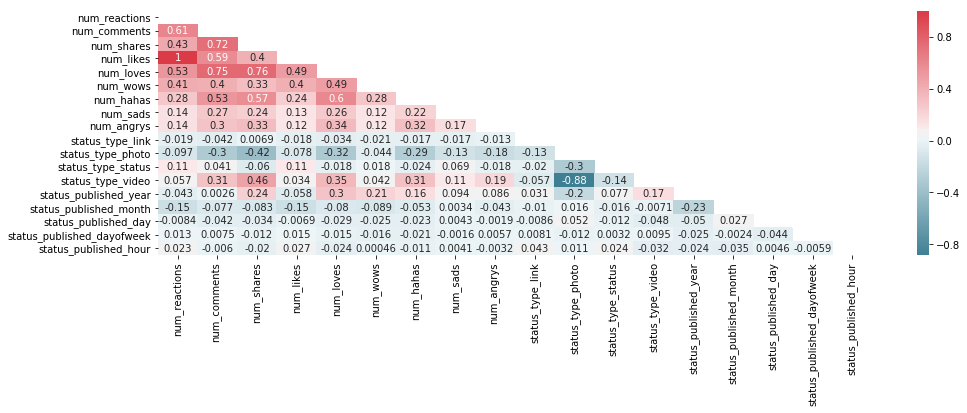

In [101]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 4.5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)

In [102]:
import math
from scipy.stats import pearsonr

corr = df.corr()
corr_abs = corr.abs()
corr_tuples = []

# get highest corr for each col
for (i, col) in enumerate(corr_abs.columns):
    corr_with_col = corr_abs.iloc[:, i]\
        .sort_values(ascending=False)
    
    highest_corr = corr_with_col[1]
    if not math.isnan(highest_corr):
        col2 = corr_with_col.index[1]
        pvalue = pearsonr(df[col], df[col2])[1]
        
        corr_tuples.append((col, col2, float(highest_corr), pvalue))    
        
# sort by corr
corr_tuples = sorted(corr_tuples, key=lambda x: x[2], reverse=True)

# remove duplicates
for i, tup in enumerate(corr_tuples):
    try:
        next_tup = corr_tuples[i + 1]    
        if next_tup[0] == tup[1] and next_tup[1] == tup[0]:
            corr_tuples.remove(tup)
    except IndexError:
        break

In [103]:
# P-value ≤ α: The correlation is statistically significant
# Usually, a significance level (denoted as α or alpha) of 0.05 works well
# https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/

for tup in corr_tuples:
    print(tup)

('num_likes', 'num_reactions', 0.9983547565835712, 0.0)
('status_type_video', 'status_type_photo', 0.882405213947888, 0.0)
('num_loves', 'num_shares', 0.7576280925884126, 0.0)
('num_comments', 'num_loves', 0.7545623353422239, 0.0)
('num_hahas', 'num_loves', 0.6012447807089705, 0.0)
('num_wows', 'num_loves', 0.48772917118876535, 0.0)
('num_angrys', 'num_loves', 0.3433426036538726, 2.4546792700549886e-161)
('status_type_status', 'status_type_photo', 0.3047974099327285, 7.308292643731947e-126)
('status_published_year', 'num_loves', 0.29547538541692697, 4.759142159528976e-118)
('num_sads', 'num_comments', 0.26500840750383486, 1.7215296433455214e-94)
('status_published_month', 'status_published_year', 0.22862805458230775, 3.6695609974160304e-70)
('status_type_link', 'status_type_photo', 0.12726866505213877, 1.5753613731294058e-22)
('status_published_day', 'status_type_photo', 0.05221053355212867, 6.52928406597269e-05)
('status_published_dayofweek', 'status_published_day', 0.0437327011592964

In [104]:
# Scatter Plots for r > 0.7 and p < 0.05

sorted_pairs = list(filter(lambda x: x[2] > 0.7 and x[3] < 0.05, corr_tuples))
sorted_pairs

[('num_likes', 'num_reactions', 0.9983547565835712, 0.0),
 ('status_type_video', 'status_type_photo', 0.882405213947888, 0.0),
 ('num_loves', 'num_shares', 0.7576280925884126, 0.0),
 ('num_comments', 'num_loves', 0.7545623353422239, 0.0)]

In [141]:
import matplotlib.gridspec as gridspec

def plot_corr_pairs(sorted_pairs):
    ncols = min(len(sorted_pairs), 3)
    nrows = math.ceil(len(sorted_pairs) / ncols)
    
    fig = plt.figure(figsize=(13,8))
    gs = gridspec.GridSpec(nrows, ncols)       

    for i, sorted_pair in enumerate(sorted_pairs):        
        x = sorted_pair[0]
        y = sorted_pair[1]

        jp = sns.jointplot(x=x, y=y, data=df, kind='hex', gridsize=10)
        SeabornFig2Grid(jp, fig, gs[i])
        
    gs.tight_layout(fig)
    #gs.update(top=0.7)

    plt.show()

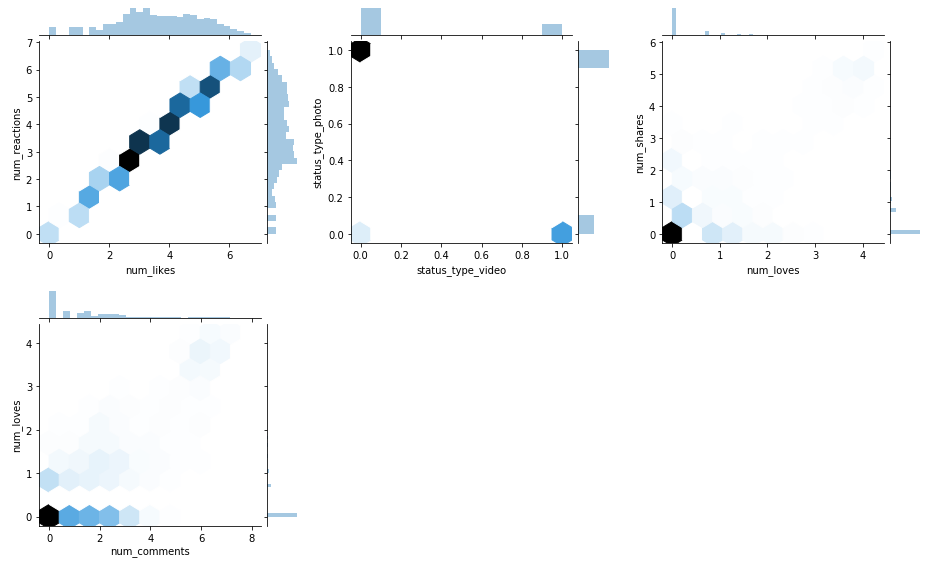

In [143]:
plot_corr_pairs(sorted_pairs)

In [139]:
# https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())